In [1]:
import os
import librosa.display
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
from query_wav_data import export_query_results

db_url = os.getenv("DB_URL")

csv_path = export_query_results(
    db_url=db_url,
    date_range='2025-02-25',
    serial_number='ITRI0003003',
)

print(f"CSV 檔案已匯出至 {csv_path}")


資料已成功匯出至 query_results_ITRI0003003_2025-02-25_range_0.csv
CSV 檔案已匯出至 query_results_ITRI0003003_2025-02-25_range_0.csv


In [3]:
from download_file_from_ftp import read_line, download_file, connect_sftp, close_sftp
import pandas as pd
df = pd.read_csv(csv_path)
for index, row in tqdm(df.iterrows(), total=len(df)):
    read_line(row)

100%|██████████| 257/257 [00:00<00:00, 21417.79it/s]

serial_number: ITRI0003003
wav_data: 2025-02-25T103121
serial_number: ITRI0003003
wav_data: 2025-02-25T103127
serial_number: ITRI0003003
wav_data: 2025-02-25T103134
serial_number: ITRI0003003
wav_data: 2025-02-25T103143
serial_number: ITRI0003003
wav_data: 2025-02-25T103152
serial_number: ITRI0003003
wav_data: 2025-02-25T103228
serial_number: ITRI0003003
wav_data: 2025-02-25T103237
serial_number: ITRI0003003
wav_data: 2025-02-25T103304
serial_number: ITRI0003003
wav_data: 2025-02-25T103313
serial_number: ITRI0003003
wav_data: 2025-02-25T103345
serial_number: ITRI0003003
wav_data: 2025-02-25T103351
serial_number: ITRI0003003
wav_data: 2025-02-25T103423
serial_number: ITRI0003003
wav_data: 2025-02-25T103430
serial_number: ITRI0003003
wav_data: 2025-02-25T103503
serial_number: ITRI0003003
wav_data: 2025-02-25T103514
serial_number: ITRI0003003
wav_data: 2025-02-25T103546
serial_number: ITRI0003003
wav_data: 2025-02-25T103556
serial_number: ITRI0003003
wav_data: 2025-02-25T103627
serial_num

In [4]:
def load_wav_images(local_file_path, target_sr=32000):
    y, sr = librosa.load(local_file_path, sr=None, mono=True)
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
    return y

In [5]:
from plotting import plot_mel_stft_fft_1d_3d

def plot_wav_images(y, mel_img, stft_img, file_name):
    plot_mel_stft_fft_1d_3d(y, file_name, mel_img, stft_img, '2025-02-25')

n_mels: 128
mels_n_fft: 1024
mels_hop_length: 256


In [6]:
y = load_wav_images("dataset/2025-02-25/0/ITRI0003003/2025-02-25T103121.wav")

|UID|----|日期|
|----|----|2025-02-25|
|複合管: n%|----|2025-02-25|
|環境音: n%|----|----|
|金屬音: n%|----|----|
|雜訊音: n%|----|----|


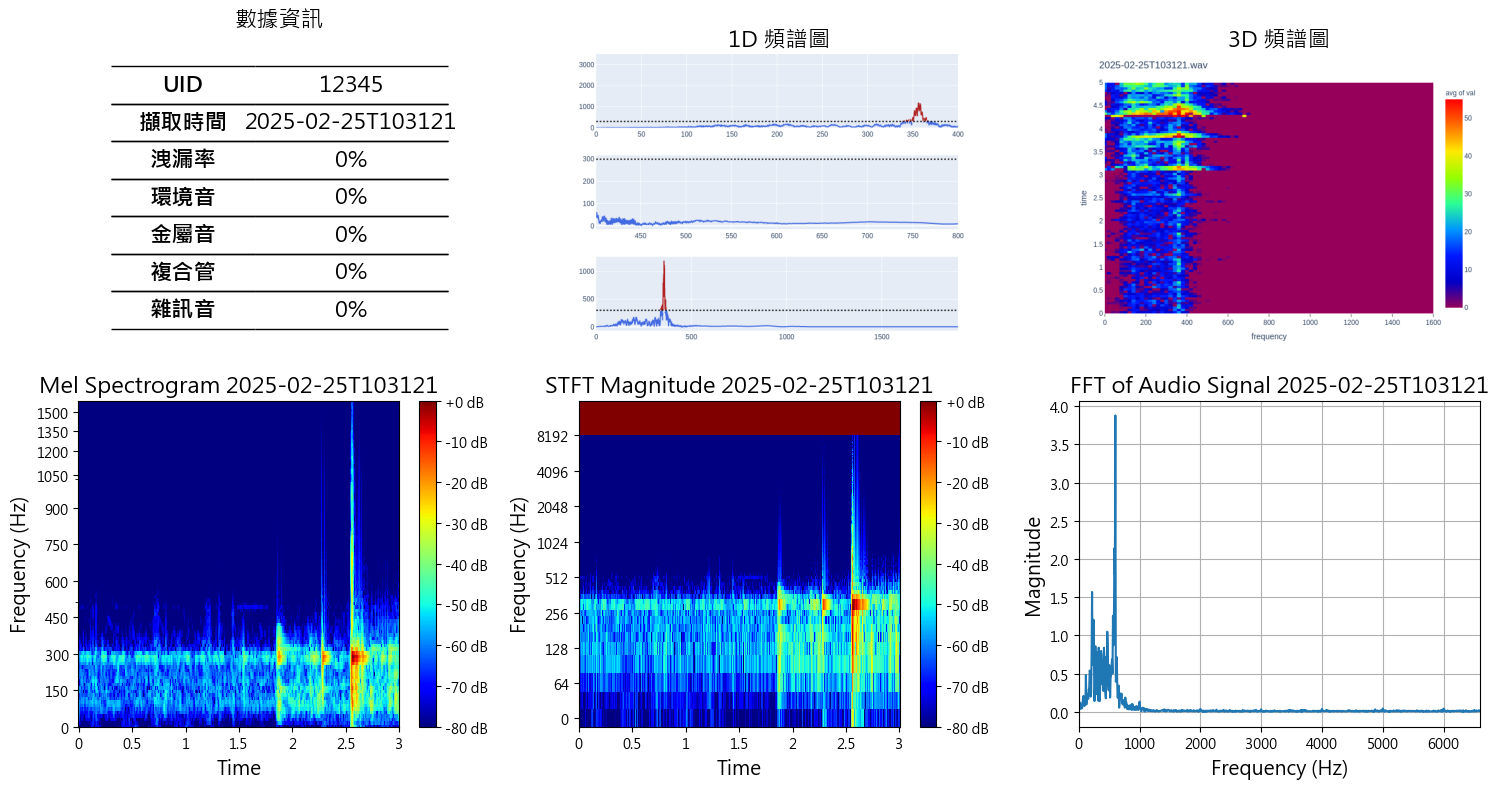

In [7]:
plot_wav_images(y,  "dataset/2025-02-25/0/ITRI0003003/2025-02-25T103121_1d.png", "dataset/2025-02-25/0/ITRI0003003/2025-02-25T103121_3d.png", "2025-02-25T103121")
